
Clustered Data (first 10 rows):
      PROFIT  CLUSTER
0  192261.83        0
1  191792.06        0
2  191050.39        0
3  182901.99        0
4  166187.94        0
5  156991.12        0
6  156122.51        0
7  155752.60        0
8  152211.77        0
9  149759.96        0


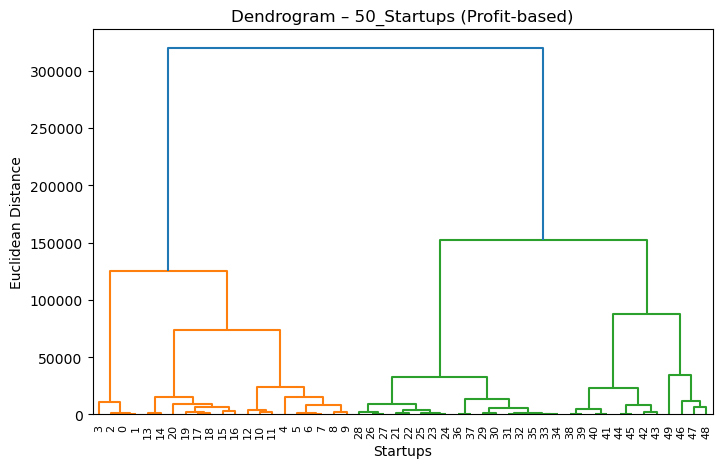

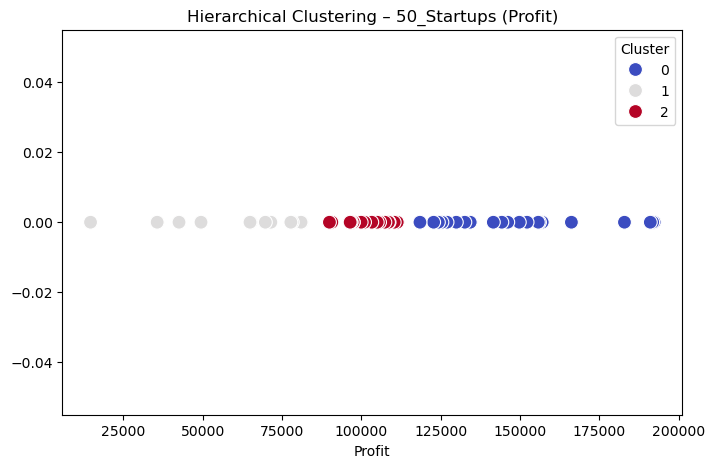

In [2]:
# Hierarchical Clustering – 50_Startups.csv
# Clustering based on Profit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# -----------------------------
# Load and preprocess dataset
# -----------------------------
df = pd.read_csv("50_Startups.csv")

# Normalize column names to uppercase (for safety)
df.columns = df.columns.str.upper()

# Encode categorical column (STATE)
le = LabelEncoder()
if df["STATE"].dtype == 'object':
    df["STATE"] = le.fit_transform(df["STATE"])

# Select feature for clustering
X = df[["PROFIT"]]

# -----------------------------
# Apply Hierarchical Clustering
# -----------------------------
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df["CLUSTER"] = hc.fit_predict(X)

print("\nClustered Data (first 10 rows):")
print(df[["PROFIT", "CLUSTER"]].head(10))

# -----------------------------
# Dendrogram Visualization
# -----------------------------
plt.figure(figsize=(8, 5))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title("Dendrogram – 50_Startups (Profit-based)")
plt.xlabel("Startups")
plt.ylabel("Euclidean Distance")
plt.show()

# -----------------------------
# Scatter Plot Visualization
# -----------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x="PROFIT", y=[0]*len(df), hue="CLUSTER", data=df, palette="coolwarm", s=100)
plt.title("Hierarchical Clustering – 50_Startups (Profit)")
plt.xlabel("Profit")
plt.legend(title="Cluster")
plt.show()
